# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [4]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


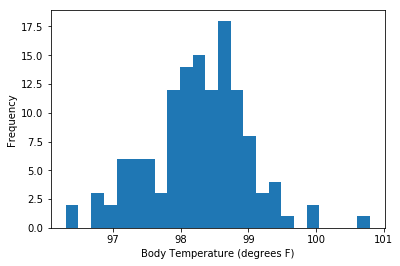

In [53]:
# Your work here.
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# 1. Is the distribution of body temperatures normal?
plt.hist(df.temperature, bins=24)
plt.xlabel('Body Temperature (degrees F)')
plt.ylabel('Frequency')
plt.show()

# The distribution of body temperatures appears to be normal.

In [54]:
# 2. Is the sample size large? Are the observations independent?
df.count() # the sample size is 130

# To satisfy the Central Limit Theorem, the observations are independent.

temperature    130
gender         130
heart_rate     130
dtype: int64

In [56]:
# 3. Is the true population mean really 98.6 degrees F?

## We would use a one sample z-test because we are testing for one whole population where body temperature distribution appears to be normal.

## Hypothesis
# H0 (null); u = 98.6 degrees F, where u = population mean
# H1 (alt.); u != 98.6 degrees F
# alpha = 0.05

# Establish all values needed for calculations
u = 98.6 # population mean that we are testing for
n = 130 # sample size

temp_s_mean = df.temperature.mean() # body temperature sample mean
temp_std = df.temperature.std() # body temperature sample standard deviation
sqrt_n = n ** 0.5
temp_s_std = temp_std / sqrt_n
z_temp = (temp_s_mean - u) / temp_s_std
z_temp

# Since we set the alpha at 0.05 and performed a two-tailed Z-test, if the z-score is > 1.64 or < -1.64 then we reject the null hypothesis (H0)
# We obtained a z-score of -5.455, which is less than -1.64, so we reject the H0. Therefore, 98.6 degrees F is not the true population mean body temperature.


-5.454823292364079

In [63]:
# 4. At what temperature should we consider someone's temperature to be "abnormal"?

# We will construct a 95% confidence interval, in other words our alpha = 0.5
z = 1.96 # this is the z-score for a 95% confidence interval

# Calculate Margin of Error (ME)
ME = z * temp_s_std

# Calculate Confidence Interval
lower_temp = temp_s_mean - ME
upper_temp = temp_s_mean + ME

print(lower_temp, upper_temp)

# We are 95% confident that the true population mean lies between 98.12 and 98.38 degrees F.
# Therefore, a temperature would consider to be "abnormal" if it is out of that range.

98.12319411222852 98.37526742623304


In [89]:
# 5. Is there a significant difference between males and females in normal temperature?

## Hypothesis
# H0 (null); fem_mean - male_mean = 0
# H1 (alt.); fem_mean - male_mean != 0
# alpha < 0.05

# We will be performing a two-sampled T-test to see if there's a significant difference between the two genders.
male = df[df.gender == 'M']
fem = df[df.gender == 'F']
male_size = male.temperature.count() # the male sample size is 65
fem_size = fem.temperature.count() # the female sample size is 65

temp_std = df.temperature.std()
male_mean = male.temperature.mean() # male temperature mean
fem_mean = fem.temperature.mean() # female temperature mean
s = ((temp_std ** 2)*((1/fem_size)+(1/male_size)))** 0.5

t = (fem_mean - male_mean) / s # we got a t-score = 2.249

n = (fem_size - 1) + (male_size - 1)
pval = stats.t.sf(np.abs(t), n-1)*2 # p-value for two-tailed t-test
pval

# The difference between male and female body temperatures is significant.
# We obtained a p-value of 0.0262 which is less than 0.05. Hence, we reject the null hypothesis.

# According to this dataset, the mean normal body temperature of 98.6 F is statistically incorrect.
# It appears that the true mean temperature lies between 98.1 and 98.4 degrees F, with 95% certainty.

0.026240529257260795